# Welcome to HW2

In this assignment you will be implementing a neural network in order to perform regression on the Airfoil Self-Noise data set. Remember to restart and run all cells before submission. Points will be deducted if you do not do this. When you are ready to submit, you can convert your notebook to a PDF file by printing the page either with `ctrl + p` or `command + p` and then saving as p1.pdf.

## The imports and helper functions should not be modified in any way.

In [52]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [53]:
def evaluate(model, test_data):
    '''
        Do not modify this code.
    '''
    test_loader = DataLoader(Dataset(test_data), batch_size=1)
    loss_fn = torch.nn.MSELoss()
    with torch.no_grad():
        total_loss = 0
        for x, y in test_loader:
            pred = model(x)
            total_loss += loss_fn(pred, y).item()
    print("TOTAL EVALUATION LOSS: {0:.5f}".format(total_loss))

In [54]:
def plot_training_curves(train_loss, val_loss, loss_fn_name, reduction):
    '''
        Do not modify this code.
    '''
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(train_loss, label="Train Loss")
    ax.plot(val_loss, label="Validation Loss")
    ax.legend(loc='best')
    ax.set_title("Loss During Training", fontsize=16)
    ax.set_xlabel("Epochs", fontsize=14)
    ax.set_ylabel("Loss: {}(reduction={})".format(loss_fn_name, reduction), fontsize=14)
    plt.savefig("./example_loss.pdf")
    plt.show()

## a) Implement your dataset object.

Do not modify the function definitions. Please note that the first five columns of the airfoil data are features and the last column is the target. Your dataset should have one attribute for the features, one attribute for the targets, and should return the specified features and target in `__getitem__()` as separate values.

In [55]:
class Dataset(torch.utils.data.Dataset):
    """Create your dataset here."""

    def __init__(self, airfoil_data):
        """
            Initialize your Dataset object with features and labels
        """
        ### Define your features and labels here
        self.features = airfoil_data[:, :-1] 
        self.targets = airfoil_data[:, -1]

    def __len__(self):
        ### Define the length of your data set
        return len(self.features)

    def __getitem__(self, idx):
        ### Return the features and labels of your data for a given index
        feature = torch.tensor(self.features[idx], dtype=torch.float32)
        target = torch.tensor(self.targets[idx], dtype=torch.float32)
        target = target.unsqueeze(-1)
        return feature, target

## b) Implement the model architecture and `forward` function.

Do not modify the function definitions. You will need to define input, hidden, and output layers, as well as the activation function.

In [56]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, hidden=[32], activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()
        '''
            Implement your neural network here. You will need to add layers and an activation function.
            You are free to modify the number of layers in the hidden list.
        '''
        ### Define your input, hidden and output layers here
        
        ### Set your activation function here
        
        self.seq = nn.Sequential(
            nn.Linear(input_dimension, 32),
            activation,
            nn.Linear(32, 64),
            activation,
            nn.Linear(64, 84),
            nn.Tanh(),
            nn.Linear(84, 84),
            activation,
            nn.Linear(84, 84),
            nn.Tanh(),
            nn.Linear(84, 64),
            activation,
            nn.Linear(64, 34),
            activation,
            nn.Linear(34, 24),
            activation,
            nn.Linear(24, 10),
            activation,
            nn.Linear(10, output_dimension)
        )  

    def forward(self, x):
        '''
            Implement the forward function using the layers and activation function you defined above.
        '''
        ### Call your hidden layers and activation function to do the forward pass through your network.
        
        return self.seq(x) #self.layers(x)

## c, d) Define hyperparameters and implement the training loop.

You will need to choose your loss function, number of epochs, optimizer learning rate, optimizer weight decay, and batch size for part (c). You will need to set up the DataLoader, implement the forward pass, and implement the backpropagation update.

In [57]:
def train(model, train_data, validation_data):

    ###
    #  Modify these parameters
    ###
    loss_fn = torch.nn.MSELoss()
    epochs = 2500
    learning_rate = 0.001
    weight_decay = 0.001
    batch_size = 600

    # Set up data
    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    # The Adam optimizer is recommended for this assignment.
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        model.eval()
        val_loss = 0
            
        with torch.no_grad():
            for x, y in validation_loader:
                
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()
                
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(validation_loader))


        # Feel free to modify how frequently training progress is printed
        if(ep%100 == 0):
            print("Train Loss: {0:.4f}\tValidation Loss: {1:.4f}".format(train_loss, val_loss))

        # Hold on to losses for easy saving and plotting
    
    # Save your losses as .npy files
    np.save("./train_losses.npy", train_losses)
    np.save("./val_losses.npy", val_losses)

    # Save the model as ./p1_model.pt
    torch.save(model.state_dict(), "./hw1_model.pt")
    return model

## e) Load your data, then train and evaluate your model before plotting the training curves.

(903, 6)


  0%|▏                                         | 8/2500 [00:00<00:31, 79.37it/s]

Train Loss: 2.0128	Validation Loss: 1.0505


  5%|█▉                                     | 123/2500 [00:01<00:22, 107.89it/s]

Train Loss: 0.2316	Validation Loss: 0.1662


  9%|███▍                                   | 218/2500 [00:02<00:20, 109.51it/s]

Train Loss: 0.0985	Validation Loss: 0.0898


 13%|████▉                                  | 316/2500 [00:02<00:18, 118.74it/s]

Train Loss: 0.0751	Validation Loss: 0.0854


 17%|██████▌                                | 419/2500 [00:03<00:17, 117.54it/s]

Train Loss: 0.0651	Validation Loss: 0.0771


 21%|████████                               | 515/2500 [00:04<00:17, 114.54it/s]

Train Loss: 0.0554	Validation Loss: 0.0730


 25%|█████████▌                             | 614/2500 [00:05<00:17, 107.85it/s]

Train Loss: 0.0616	Validation Loss: 0.0681


 28%|███████████                            | 712/2500 [00:06<00:17, 101.92it/s]

Train Loss: 0.0508	Validation Loss: 0.0681


 32%|████████████▋                          | 812/2500 [00:07<00:14, 119.73it/s]

Train Loss: 0.0443	Validation Loss: 0.0638


 37%|██████████████▏                        | 913/2500 [00:08<00:13, 120.01it/s]

Train Loss: 0.0432	Validation Loss: 0.0669


 41%|███████████████▍                      | 1016/2500 [00:09<00:12, 115.68it/s]

Train Loss: 0.0387	Validation Loss: 0.0649


 45%|█████████████████                     | 1119/2500 [00:10<00:12, 109.27it/s]

Train Loss: 0.0333	Validation Loss: 0.0700


 49%|██████████████████▌                   | 1223/2500 [00:10<00:10, 120.82it/s]

Train Loss: 0.0347	Validation Loss: 0.0594


 53%|████████████████████▏                 | 1325/2500 [00:11<00:09, 120.31it/s]

Train Loss: 0.0353	Validation Loss: 0.0679


 57%|█████████████████████▌                | 1416/2500 [00:12<00:09, 113.86it/s]

Train Loss: 0.0339	Validation Loss: 0.0601


 61%|███████████████████████               | 1520/2500 [00:13<00:08, 111.98it/s]

Train Loss: 0.0371	Validation Loss: 0.0631


 65%|████████████████████████▋             | 1623/2500 [00:14<00:07, 119.34it/s]

Train Loss: 0.0294	Validation Loss: 0.0572


 69%|██████████████████████████▏           | 1723/2500 [00:15<00:06, 118.19it/s]

Train Loss: 0.0260	Validation Loss: 0.0591


 73%|███████████████████████████▊          | 1826/2500 [00:16<00:05, 120.31it/s]

Train Loss: 0.0289	Validation Loss: 0.0590


 77%|█████████████████████████████         | 1916/2500 [00:16<00:05, 112.48it/s]

Train Loss: 0.0324	Validation Loss: 0.0579


 81%|██████████████████████████████▋       | 2018/2500 [00:17<00:03, 122.71it/s]

Train Loss: 0.0233	Validation Loss: 0.0603


 85%|████████████████████████████████▎     | 2122/2500 [00:18<00:03, 120.80it/s]

Train Loss: 0.0253	Validation Loss: 0.0618


 89%|█████████████████████████████████▊    | 2224/2500 [00:19<00:02, 119.56it/s]

Train Loss: 0.0261	Validation Loss: 0.0576


 93%|███████████████████████████████████▎  | 2322/2500 [00:20<00:01, 108.97it/s]

Train Loss: 0.0223	Validation Loss: 0.0568


 96%|████████████████████████████████████▋ | 2412/2500 [00:21<00:00, 120.34it/s]

Train Loss: 0.0237	Validation Loss: 0.0595


100%|██████████████████████████████████████| 2500/2500 [00:21<00:00, 113.93it/s]


TOTAL EVALUATION LOSS: 12.65069


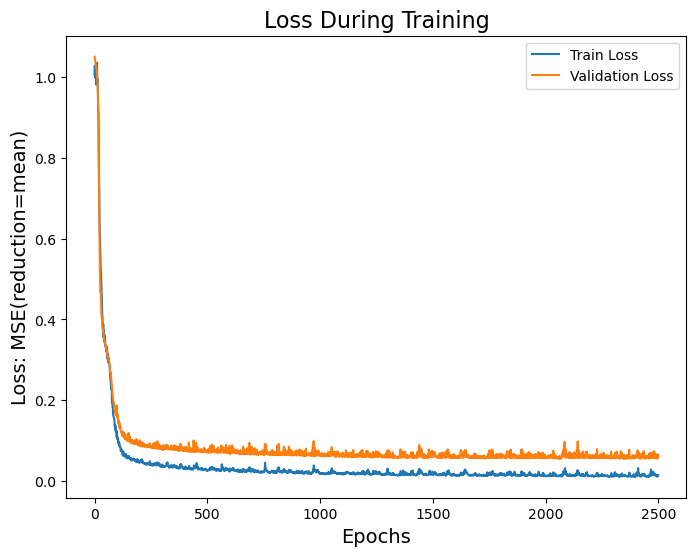

In [58]:
if __name__ == '__main__':
    torch.manual_seed(137)
    
    # Load in the provided data
    train_data = np.load('train_data.npy')
    print(train_data.shape)
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    model = NeuralNetwork()
    
    trained_model = train(model, train_data, validation_data)
    evaluate(trained_model, test_data)

    # Load your training data and call the provided plot function. Loss function and reduction scheme are
    # required for the plotting function.
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")

    plot_training_curves(train_losses, val_losses, "MSE", "mean")

## f) Run 4 different hyperparameter combinations and explain the differences in results

I have tried 4 different combinations as below: 

Mode1: learning_rate = 0.01 (instead of learning_rate =  0.001 in the main code)

Mode2: weight_decay = 0.01 (instead of weight_decay = 0.001 in the main code)

Mode3: epochs = 1000 (instead of epochs = 2500 in the main code)

Mode4: removing 2 last hidden layers  


Explaining each the results of each mode:

Mode 1: by increasing learning rate to 0.01, we still have an acceptable total loss value for the test data set, and we see that we are getting a curve, as expected and discribed in the HW discription.

Mode 2: by increasing weight decay to 0.01, we get a very large value for total loss value of the test data set, and we see that loss curve for training and validation dataset is osccilating, which implies the model performance is not acceptable.

Mode 3:
By decreasing number of epochs, we get acceptable total loss, meaning that we could have used lower number of epochs for almost the same level of accuracy, which could help in decreasing computational cost.

Mode 4:By removing two of the hidden layers, we decrease the depth of our neural network, which results in a larger value for total loss of test data. Therefore, removing these layers from our neural net is not recommended.

Mode 1 results
(903, 6)


  0%|                                                  | 0/2500 [00:00<?, ?it/s]

Train Loss: 2.0043	Validation Loss: 1.0199


  5%|█▉                                     | 123/2500 [00:01<00:20, 117.78it/s]

Train Loss: 0.1014	Validation Loss: 0.0845


  9%|███▍                                   | 223/2500 [00:01<00:19, 115.28it/s]

Train Loss: 0.0938	Validation Loss: 0.1094


 13%|████▉                                  | 313/2500 [00:02<00:19, 110.66it/s]

Train Loss: 0.0770	Validation Loss: 0.1126


 17%|██████▍                                | 416/2500 [00:03<00:17, 122.07it/s]

Train Loss: 0.0515	Validation Loss: 0.0674


 21%|████████                               | 519/2500 [00:04<00:16, 119.80it/s]

Train Loss: 0.0565	Validation Loss: 0.0784


 25%|█████████▋                             | 621/2500 [00:05<00:15, 117.51it/s]

Train Loss: 0.0399	Validation Loss: 0.0680


 29%|███████████▎                           | 725/2500 [00:06<00:15, 116.06it/s]

Train Loss: 0.0395	Validation Loss: 0.0673


 32%|████████████▋                          | 812/2500 [00:07<00:13, 121.79it/s]

Train Loss: 0.0641	Validation Loss: 0.0913


 37%|██████████████▏                        | 913/2500 [00:07<00:13, 120.40it/s]

Train Loss: 0.0379	Validation Loss: 0.0673


 41%|███████████████▍                      | 1016/2500 [00:08<00:12, 119.28it/s]

Train Loss: 0.0247	Validation Loss: 0.0618


 45%|█████████████████                     | 1119/2500 [00:09<00:12, 114.02it/s]

Train Loss: 0.0645	Validation Loss: 0.0861


 48%|██████████████████▍                   | 1209/2500 [00:10<00:10, 122.70it/s]

Train Loss: 0.0321	Validation Loss: 0.0674


 53%|████████████████████                  | 1324/2500 [00:11<00:09, 119.25it/s]

Train Loss: 0.0390	Validation Loss: 0.0752


 57%|█████████████████████▋                | 1423/2500 [00:12<00:09, 118.51it/s]

Train Loss: 0.0320	Validation Loss: 0.0758


 61%|███████████████████████▏              | 1526/2500 [00:13<00:08, 117.96it/s]

Train Loss: 0.0649	Validation Loss: 0.0653


 65%|████████████████████████▌             | 1616/2500 [00:13<00:08, 101.04it/s]

Train Loss: 0.0450	Validation Loss: 0.1138


 69%|██████████████████████████            | 1714/2500 [00:14<00:06, 121.05it/s]

Train Loss: 0.0419	Validation Loss: 0.0698


 73%|███████████████████████████▋          | 1818/2500 [00:15<00:05, 120.79it/s]

Train Loss: 0.0489	Validation Loss: 0.0836


 77%|█████████████████████████████▏        | 1920/2500 [00:16<00:04, 119.27it/s]

Train Loss: 0.0229	Validation Loss: 0.0677


 81%|██████████████████████████████▊       | 2024/2500 [00:17<00:04, 112.89it/s]

Train Loss: 0.0455	Validation Loss: 0.0916


 85%|████████████████████████████████▏     | 2114/2500 [00:18<00:03, 120.73it/s]

Train Loss: 0.0534	Validation Loss: 0.0694


 89%|█████████████████████████████████▋    | 2214/2500 [00:19<00:02, 119.01it/s]

Train Loss: 0.0251	Validation Loss: 0.0745


 93%|███████████████████████████████████▏  | 2313/2500 [00:19<00:01, 118.47it/s]

Train Loss: 0.0326	Validation Loss: 0.0711


 97%|████████████████████████████████████▋ | 2417/2500 [00:20<00:00, 110.59it/s]

Train Loss: 0.0479	Validation Loss: 0.0853


100%|██████████████████████████████████████| 2500/2500 [00:21<00:00, 116.15it/s]


TOTAL EVALUATION LOSS: 14.70832


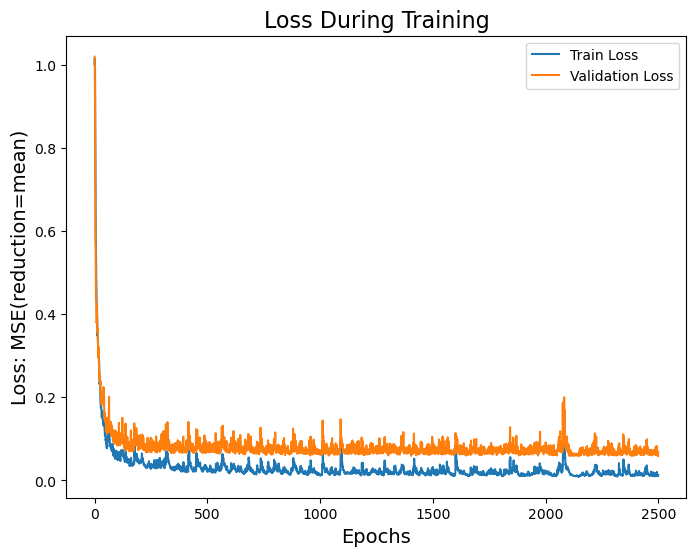

In [59]:
def train(model, train_data, validation_data):

    ###
    #  Modify these parameters
    ###
    loss_fn = torch.nn.MSELoss()
    epochs = 2500
    learning_rate = 0.01
    weight_decay = 0.001
    batch_size = 600

    # Set up data
    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    # The Adam optimizer is recommended for this assignment.
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        model.eval()
        val_loss = 0
            
        with torch.no_grad():
            for x, y in validation_loader:
                
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()
                
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(validation_loader))


        # Feel free to modify how frequently training progress is printed
        
        if(ep%100 == 0):
            print("Train Loss: {0:.4f}\tValidation Loss: {1:.4f}".format(train_loss, val_loss))

        # Hold on to losses for easy saving and plotting
    
    # Save your losses as .npy files
    np.save("./train_losses.npy", train_losses)
    np.save("./val_losses.npy", val_losses)

    # Save the model as ./p1_model.pt
    torch.save(model.state_dict(), "./p2_model.pt")
    return model


print("Mode 1 results")

if __name__ == '__main__':
    torch.manual_seed(137)
    
    # Load in the provided data
    train_data = np.load('train_data.npy')
    print(train_data.shape)
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    model = NeuralNetwork()
    
    trained_model = train(model, train_data, validation_data)
    evaluate(trained_model, test_data)

    # Load your training data and call the provided plot function. Loss function and reduction scheme are
    # required for the plotting function.
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")

    plot_training_curves(train_losses, val_losses, "MSE", "mean")


Mode 2 results
(903, 6)


  0%|                                                  | 0/2500 [00:00<?, ?it/s]

Train Loss: 2.0131	Validation Loss: 1.0514


  5%|█▉                                     | 122/2500 [00:01<00:19, 121.29it/s]

Train Loss: 1.9893	Validation Loss: 1.0137


  9%|███▌                                   | 225/2500 [00:01<00:19, 119.34it/s]

Train Loss: 1.9797	Validation Loss: 1.0125


 13%|████▉                                  | 315/2500 [00:02<00:19, 114.82it/s]

Train Loss: 2.0057	Validation Loss: 1.0132


 16%|██████▎                                | 407/2500 [00:03<00:17, 121.50it/s]

Train Loss: 1.9970	Validation Loss: 1.0122


 21%|████████▏                              | 522/2500 [00:04<00:16, 120.77it/s]

Train Loss: 2.0093	Validation Loss: 1.0124


 25%|█████████▌                             | 613/2500 [00:05<00:15, 121.45it/s]

Train Loss: 1.9992	Validation Loss: 1.0123


 29%|███████████▏                           | 716/2500 [00:06<00:15, 117.22it/s]

Train Loss: 2.0025	Validation Loss: 1.0135


 33%|████████████▊                          | 818/2500 [00:07<00:15, 109.70it/s]

Train Loss: 2.0026	Validation Loss: 1.0124


 37%|██████████████▎                        | 920/2500 [00:07<00:12, 124.90it/s]

Train Loss: 2.0355	Validation Loss: 1.0124


 41%|███████████████▍                      | 1016/2500 [00:08<00:13, 113.81it/s]

Train Loss: 2.0153	Validation Loss: 1.0115


 45%|████████████████▉                     | 1114/2500 [00:09<00:12, 113.11it/s]

Train Loss: 2.0138	Validation Loss: 1.0125


 49%|██████████████████▍                   | 1217/2500 [00:10<00:11, 109.35it/s]

Train Loss: 2.0107	Validation Loss: 1.0117


 53%|████████████████████                  | 1319/2500 [00:11<00:09, 119.89it/s]

Train Loss: 1.9674	Validation Loss: 1.0135


 57%|█████████████████████▌                | 1421/2500 [00:12<00:08, 120.76it/s]

Train Loss: 2.0116	Validation Loss: 1.0123


 61%|███████████████████████▏              | 1522/2500 [00:13<00:08, 116.34it/s]

Train Loss: 2.0068	Validation Loss: 1.0129


 65%|████████████████████████▋             | 1625/2500 [00:14<00:07, 115.96it/s]

Train Loss: 1.9744	Validation Loss: 1.0129


 69%|██████████████████████████            | 1714/2500 [00:14<00:06, 117.41it/s]

Train Loss: 1.9685	Validation Loss: 1.0123


 73%|███████████████████████████▌          | 1815/2500 [00:15<00:05, 117.65it/s]

Train Loss: 2.0035	Validation Loss: 1.0124


 77%|█████████████████████████████▏        | 1917/2500 [00:16<00:04, 117.78it/s]

Train Loss: 2.0089	Validation Loss: 1.0125


 81%|██████████████████████████████▋       | 2017/2500 [00:17<00:04, 111.69it/s]

Train Loss: 2.0061	Validation Loss: 1.0127


 85%|████████████████████████████████▏     | 2116/2500 [00:18<00:03, 105.08it/s]

Train Loss: 2.0083	Validation Loss: 1.0130


 89%|█████████████████████████████████▋    | 2215/2500 [00:19<00:02, 111.19it/s]

Train Loss: 2.0361	Validation Loss: 1.0134


 93%|███████████████████████████████████▏  | 2318/2500 [00:20<00:01, 121.85it/s]

Train Loss: 2.0266	Validation Loss: 1.0131


 97%|████████████████████████████████████▊ | 2420/2500 [00:21<00:00, 112.54it/s]

Train Loss: 1.9852	Validation Loss: 1.0127


100%|██████████████████████████████████████| 2500/2500 [00:21<00:00, 114.77it/s]


TOTAL EVALUATION LOSS: 276.50009


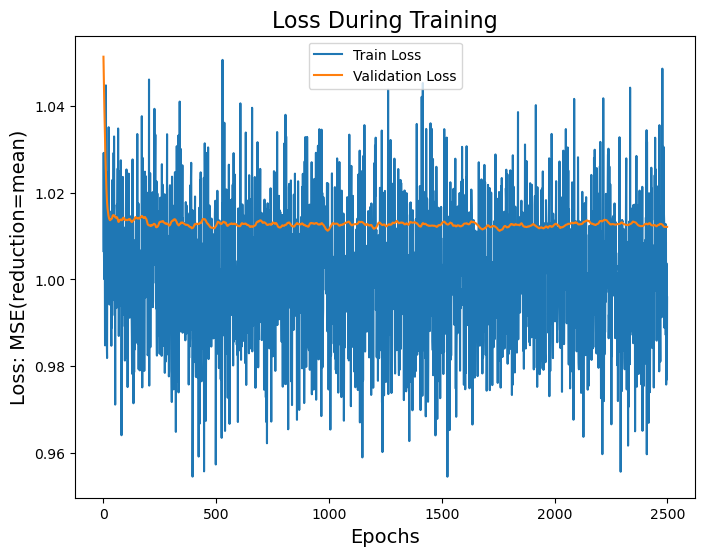

In [60]:
def train(model, train_data, validation_data):

    ###
    #  Modify these parameters
    ###
    loss_fn = torch.nn.MSELoss()
    epochs = 2500
    learning_rate = 0.001
    weight_decay = 0.01
    batch_size = 600

    # Set up data
    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    # The Adam optimizer is recommended for this assignment.
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        model.eval()
        val_loss = 0
            
        with torch.no_grad():
            for x, y in validation_loader:
                
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()
                
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(validation_loader))


        # Feel free to modify how frequently training progress is printed
        
        if(ep%100 == 0):
            print("Train Loss: {0:.4f}\tValidation Loss: {1:.4f}".format(train_loss, val_loss))

        # Hold on to losses for easy saving and plotting
    
    # Save your losses as .npy files
    np.save("./train_losses.npy", train_losses)
    np.save("./val_losses.npy", val_losses)

    # Save the model as ./p1_model.pt
    torch.save(model.state_dict(), "./p3_model.pt")
    return model


print("Mode 2 results")

if __name__ == '__main__':
    torch.manual_seed(137)
    
    # Load in the provided data
    train_data = np.load('train_data.npy')
    print(train_data.shape)
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    model = NeuralNetwork()
    
    trained_model = train(model, train_data, validation_data)
    evaluate(trained_model, test_data)

    # Load your training data and call the provided plot function. Loss function and reduction scheme are
    # required for the plotting function.
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")

    plot_training_curves(train_losses, val_losses, "MSE", "mean")

    
    

Mode 3 results
(903, 6)


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

Train Loss: 2.0128	Validation Loss: 1.0505


 11%|████▍                                  | 113/1000 [00:01<00:07, 117.64it/s]

Train Loss: 0.2316	Validation Loss: 0.1662


 22%|████████▍                              | 215/1000 [00:01<00:06, 121.17it/s]

Train Loss: 0.0985	Validation Loss: 0.0898


 31%|████████████▏                          | 314/1000 [00:02<00:06, 110.18it/s]

Train Loss: 0.0751	Validation Loss: 0.0854


 42%|████████████████▎                      | 417/1000 [00:03<00:05, 112.00it/s]

Train Loss: 0.0651	Validation Loss: 0.0771


 52%|████████████████████▎                  | 521/1000 [00:04<00:03, 120.98it/s]

Train Loss: 0.0554	Validation Loss: 0.0730


 62%|████████████████████████▎              | 624/1000 [00:05<00:03, 121.61it/s]

Train Loss: 0.0616	Validation Loss: 0.0681


 72%|████████████████████████████▏          | 724/1000 [00:06<00:02, 114.70it/s]

Train Loss: 0.0508	Validation Loss: 0.0681


 82%|███████████████████████████████▊       | 815/1000 [00:07<00:01, 112.11it/s]

Train Loss: 0.0443	Validation Loss: 0.0638


 91%|███████████████████████████████████▋   | 914/1000 [00:08<00:00, 110.32it/s]

Train Loss: 0.0432	Validation Loss: 0.0669


100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 113.63it/s]


TOTAL EVALUATION LOSS: 14.63223


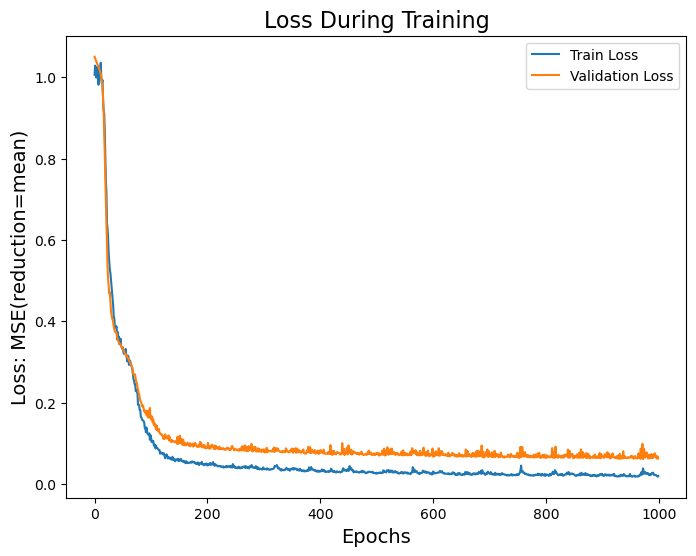

In [61]:
def train(model, train_data, validation_data):

    ###
    #  Modify these parameters
    ###
    loss_fn = torch.nn.MSELoss()
    epochs = 1000
    learning_rate = 0.001
    weight_decay = 0.001
    batch_size = 600

    # Set up data
    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    # The Adam optimizer is recommended for this assignment.
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        model.eval()
        val_loss = 0
            
        with torch.no_grad():
            for x, y in validation_loader:
                
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()
                
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(validation_loader))


        # Feel free to modify how frequently training progress is printed
        
        if(ep%100 == 0):
            print("Train Loss: {0:.4f}\tValidation Loss: {1:.4f}".format(train_loss, val_loss))

        # Hold on to losses for easy saving and plotting
    
    # Save your losses as .npy files
    np.save("./train_losses.npy", train_losses)
    np.save("./val_losses.npy", val_losses)

    # Save the model as ./p1_model.pt
    torch.save(model.state_dict(), "./p4_model.pt")
    return model


print("Mode 3 results")

if __name__ == '__main__':
    torch.manual_seed(137)
    
    # Load in the provided data
    train_data = np.load('train_data.npy')
    print(train_data.shape)
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    model = NeuralNetwork()
    
    trained_model = train(model, train_data, validation_data)
    evaluate(trained_model, test_data)

    # Load your training data and call the provided plot function. Loss function and reduction scheme are
    # required for the plotting function.
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")

    plot_training_curves(train_losses, val_losses, "MSE", "mean")

Mode 4
(903, 6)


  0%|▏                                       | 12/2500 [00:00<00:20, 118.77it/s]

Train Loss: 2.1910	Validation Loss: 1.1442


  5%|█▊                                     | 115/2500 [00:00<00:19, 122.27it/s]

Train Loss: 0.6383	Validation Loss: 0.3012


  9%|███▍                                   | 219/2500 [00:01<00:18, 121.73it/s]

Train Loss: 0.2782	Validation Loss: 0.1824


 13%|████▉                                  | 314/2500 [00:02<00:19, 110.51it/s]

Train Loss: 0.1510	Validation Loss: 0.1154


 17%|██████▌                                | 422/2500 [00:03<00:16, 127.88it/s]

Train Loss: 0.1127	Validation Loss: 0.1061


 21%|████████                               | 515/2500 [00:04<00:15, 124.92it/s]

Train Loss: 0.1113	Validation Loss: 0.0938


 25%|█████████▋                             | 620/2500 [00:05<00:15, 119.97it/s]

Train Loss: 0.0929	Validation Loss: 0.0945


 29%|███████████▎                           | 725/2500 [00:06<00:15, 116.25it/s]

Train Loss: 0.0908	Validation Loss: 0.0891


 33%|████████████▊                          | 820/2500 [00:06<00:13, 128.73it/s]

Train Loss: 0.0860	Validation Loss: 0.0864


 37%|██████████████▎                        | 917/2500 [00:07<00:12, 129.09it/s]

Train Loss: 0.0857	Validation Loss: 0.0835


 41%|███████████████▌                      | 1020/2500 [00:08<00:12, 119.85it/s]

Train Loss: 0.0796	Validation Loss: 0.0807


 45%|█████████████████                     | 1123/2500 [00:09<00:12, 113.55it/s]

Train Loss: 0.0766	Validation Loss: 0.0787


 49%|██████████████████▌                   | 1223/2500 [00:10<00:10, 123.32it/s]

Train Loss: 0.0699	Validation Loss: 0.0822


 53%|███████████████████▉                  | 1314/2500 [00:10<00:09, 124.54it/s]

Train Loss: 0.0779	Validation Loss: 0.0797


 57%|█████████████████████▌                | 1419/2500 [00:11<00:08, 122.79it/s]

Train Loss: 0.0700	Validation Loss: 0.0755


 61%|███████████████████████▏              | 1526/2500 [00:12<00:08, 120.45it/s]

Train Loss: 0.0660	Validation Loss: 0.0761


 65%|████████████████████████▌             | 1618/2500 [00:13<00:06, 127.99it/s]

Train Loss: 0.0702	Validation Loss: 0.0802


 69%|██████████████████████████▎           | 1727/2500 [00:14<00:06, 127.82it/s]

Train Loss: 0.0773	Validation Loss: 0.0881


 73%|███████████████████████████▋          | 1818/2500 [00:15<00:05, 122.99it/s]

Train Loss: 0.0670	Validation Loss: 0.0734


 77%|█████████████████████████████▏        | 1923/2500 [00:15<00:04, 121.03it/s]

Train Loss: 0.0659	Validation Loss: 0.0765


 81%|██████████████████████████████▋       | 2017/2500 [00:16<00:04, 113.81it/s]

Train Loss: 0.0703	Validation Loss: 0.0732


 85%|████████████████████████████████▎     | 2124/2500 [00:17<00:02, 128.04it/s]

Train Loss: 0.0674	Validation Loss: 0.0741


 89%|█████████████████████████████████▋    | 2215/2500 [00:18<00:02, 122.84it/s]

Train Loss: 0.0673	Validation Loss: 0.0734


 93%|███████████████████████████████████▎  | 2321/2500 [00:19<00:01, 122.44it/s]

Train Loss: 0.0679	Validation Loss: 0.0759


 97%|████████████████████████████████████▋ | 2413/2500 [00:19<00:00, 110.60it/s]

Train Loss: 0.0682	Validation Loss: 0.0804


100%|██████████████████████████████████████| 2500/2500 [00:20<00:00, 121.00it/s]


TOTAL EVALUATION LOSS: 18.05876


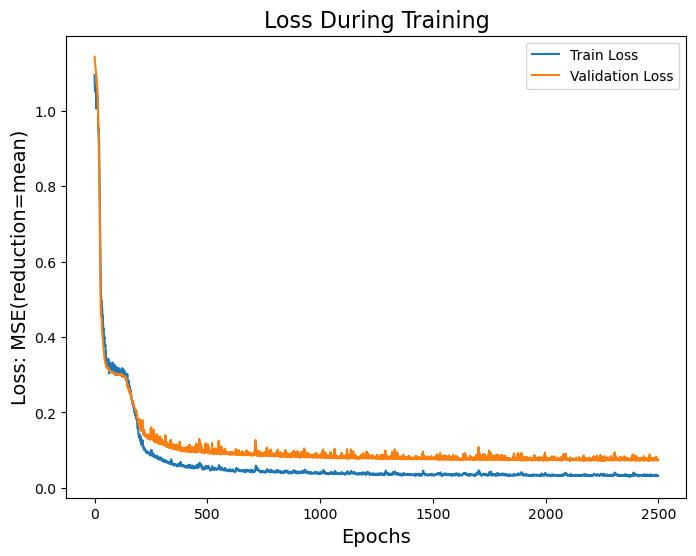

In [62]:
    
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, hidden=[32], activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()
        '''
            Implement your neural network here. You will need to add layers and an activation function.
            You are free to modify the number of layers in the hidden list.
        '''
        ### Define your input, hidden and output layers here
        
        ### Set your activation function here
        
        self.seq = nn.Sequential(
            nn.Linear(input_dimension, 32),
            activation,
            nn.Linear(32, 64),
            activation,
            nn.Linear(64, 84),
            nn.Tanh(),
            nn.Linear(84, 84),
            activation,
            nn.Linear(84, 84),
            nn.Tanh(),
            nn.Linear(84, 64),
            activation,
            nn.Linear(64, 10),
            activation,
            nn.Linear(10, output_dimension)
        )  

    def forward(self, x):
        '''
            Implement the forward function using the layers and activation function you defined above.
        '''
        ### Call your hidden layers and activation function to do the forward pass through your network.
        
        return self.seq(x) #self.layers(x)


def train(model, train_data, validation_data):

    ###
    #  Modify these parameters
    ###
    loss_fn = torch.nn.MSELoss()
    epochs = 2500
    learning_rate = 0.001
    weight_decay = 0.01
    batch_size = 600

    # Set up data
    train_loader = DataLoader(Dataset(train_data), batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(Dataset(validation_data), batch_size=batch_size)

    # The Adam optimizer is recommended for this assignment.
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        
        model.train()
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        model.eval()
        val_loss = 0
            
        with torch.no_grad():
            for x, y in validation_loader:
                
                pred = model(x)
                loss = loss_fn(pred, y)
                val_loss += loss.item()
                
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(validation_loader))


        # Feel free to modify how frequently training progress is printed
        
        if(ep%100 == 0):
            print("Train Loss: {0:.4f}\tValidation Loss: {1:.4f}".format(train_loss, val_loss))

        # Hold on to losses for easy saving and plotting
    
    # Save your losses as .npy files
    np.save("./train_losses.npy", train_losses)
    np.save("./val_losses.npy", val_losses)

    # Save the model as ./p1_model.pt
    torch.save(model.state_dict(), "./p5_model.pt")
    return model


print("Mode 4")

if __name__ == '__main__':
    torch.manual_seed(137)
    
    # Load in the provided data
    train_data = np.load('train_data.npy')
    print(train_data.shape)
    validation_data = np.load('validation_data.npy')
    test_data = np.load('test_data.npy')

    model = NeuralNetwork()
    
    trained_model = train(model, train_data, validation_data)
    evaluate(trained_model, test_data)

    # Load your training data and call the provided plot function. Loss function and reduction scheme are
    # required for the plotting function.
    train_losses = np.load("./train_losses.npy")
    val_losses = np.load("./val_losses.npy")

    plot_training_curves(train_losses, val_losses, "MSE", "mean")    
    
    
    